In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [0]:
mat = loadmat('ex6data1.mat')
X = mat['X']
y = mat['y']

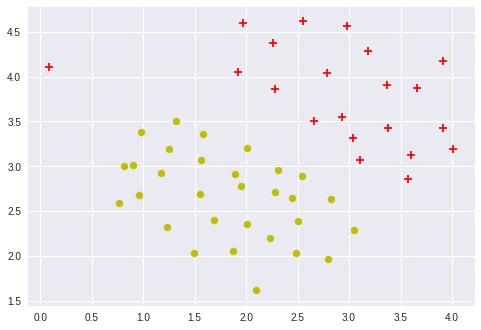

In [5]:
m,n = X.shape[0],X.shape[1]
pos,neg = (y==1).reshape(m,1),(y==0).reshape(m,1)

plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c='r',marker='+',s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c='y',marker='o',s=50)

In [10]:
from sklearn.svm import SVC
#By default C=1
classifier = SVC(kernel = 'linear')
classifier.fit(X,np.ravel(y))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

(1.5, 5)

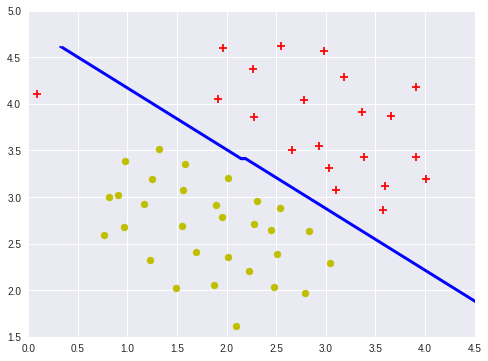

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

In [12]:
#Testing for C=100
classifier2 = SVC(C=100,kernel='linear')
classifier2.fit(X,np.ravel(y))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

(1.5, 5)

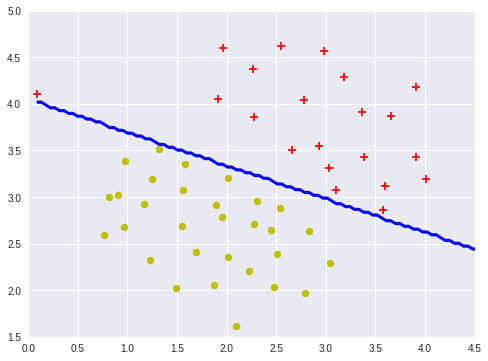

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)
# plotting the decision boundary
X_3,X_4 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_3,X_4,classifier2.predict(np.array([X_3.ravel(),X_4.ravel()]).T).reshape(X_3.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

(0.4, 1)

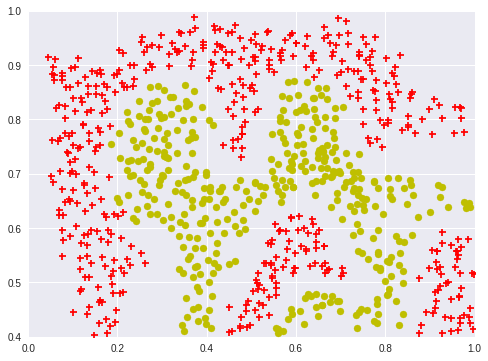

In [15]:
#Loading dataset 2 & Visualizing it
mat2 = loadmat("ex6data2.mat")
X2 = mat2["X"]
y2 = mat2["y"]
m2,n2 = X2.shape[0],X2.shape[1]
pos2,neg2= (y2==1).reshape(m2,1), (y2==0).reshape(m2,1)
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")
plt.xlim(0,1)
plt.ylim(0.4,1)

In [18]:
classifier3 = SVC(kernel="rbf",gamma=30)
classifier3.fit(X2,y2.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(0.4, 1)

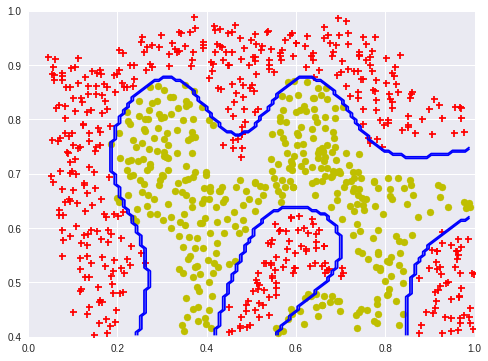

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")
# plotting the decision boundary
X_5,X_6 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
plt.contour(X_5,X_6,classifier3.predict(np.array([X_5.ravel(),X_6.ravel()]).T).reshape(X_5.shape),1,colors="b")
plt.xlim(0,1)
plt.ylim(0.4,1)

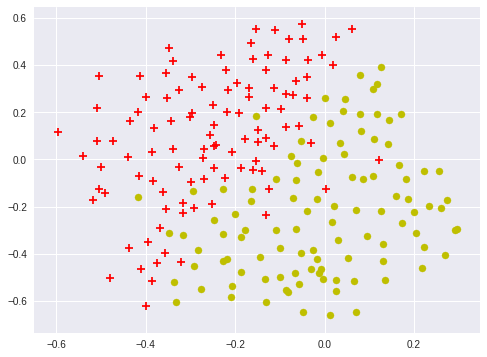

In [20]:
#Loading dataset 3 and visualizing
mat3 = loadmat("ex6data3.mat")
X3 = mat3["X"]
y3 = mat3["y"]
Xval = mat3["Xval"]
yval = mat3["yval"]
m3,n3 = X3.shape[0],X3.shape[1]
pos3,neg3= (y3==1).reshape(m3,1), (y3==0).reshape(m3,1)
plt.figure(figsize=(8,6))
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c="y",marker="o",s=50)

In [0]:
def dataParams(X,y,Xval,yval,values):
  current = 0
  best_C = 0
  best_gamma = 0
  for i in values:
     C = i
     for j in values:
        gamma = 1/j
        classifier = SVC(C=C,gamma=gamma)
        classifier.fit(X,y)
        predictions = classifier.predict(Xval)
        new_score = classifier.score(Xval,yval)
        if new_score > current:
          current = new_score
          best_C = C
          best_gamma = gamma
  return best_C, best_gamma

In [26]:
values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C, gamma = dataParams(X3, y3.ravel(), Xval, yval.ravel(),values)
classifier4 = SVC(C=C,gamma=gamma)
classifier4.fit(X3,y3.ravel())

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(-0.7, 0.5)

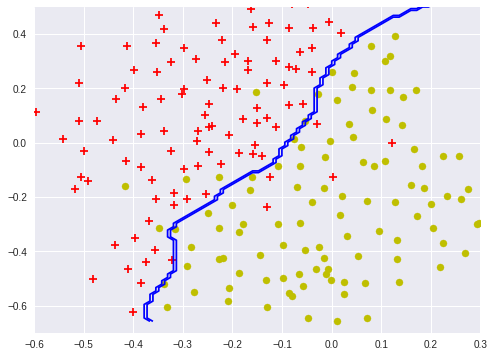

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c="y",marker="o",s=50)
# plotting the decision boundary
X_7,X_8 = np.meshgrid(np.linspace(X3[:,0].min(),X3[:,1].max(),num=100),np.linspace(X3[:,1].min(),X3[:,1].max(),num=100))
plt.contour(X_7,X_8,classifier4.predict(np.array([X_7.ravel(),X_8.ravel()]).T).reshape(X_7.shape),1,colors="b")
plt.xlim(-0.6,0.3)
plt.ylim(-0.7,0.5)

Spam Classification

In [0]:
import re
from nltk.stem import PorterStemmer

In [0]:
file_contents = open("emailSample1.txt","r").read()
vocabList = open("vocab.txt","r").read()

In [0]:
#Converting vocab list into dictionary for easy accessing
vocabList=vocabList.split("\n")[:-1]
vocabList_d={}
for ea in vocabList:
    value,key = ea.split("\t")[:]
    vocabList_d[key] = value

In [0]:
def processEmail(email_contents,vocabList_d):
    # Lower case
    email_contents = email_contents.lower()
    
    # Handle numbers
    email_contents = re.sub("[0-9]+","number",email_contents)
    
    # Handle URLS
    email_contents = re.sub("[http|https]://[^\s]*","httpaddr",email_contents)
    
    # Handle Email Addresses
    email_contents = re.sub("[^\s]+@[^\s]+","emailaddr",email_contents)
    
    # Handle $ sign
    email_contents = re.sub("[$]+","dollar",email_contents)
    
    # Strip all special characters
    specialChar = ["<","[","^",">","+","?","!","'",".",",",":"]
    for char in specialChar:
        email_contents = email_contents.replace(str(char),"")
    email_contents = email_contents.replace("\n"," ")    
    
    # Stem the word
    ps = PorterStemmer()
    email_contents = [ps.stem(token) for token in email_contents.split(" ")]
    email_contents= " ".join(email_contents)
    
    # Process the email and return word_indices
    
    word_indices=[]
    
    for char in email_contents.split():
        if len(char) >1 and char in vocabList_d:
            word_indices.append(int(vocabList_d[char]))
    
    return word_indices

In [0]:
word_indices= processEmail(file_contents,vocabList_d)

In [0]:
def emailFeatures(word_indices,vocabList_d):
  n = len(vocabList_d)
  features = np.zeros((n,1))
  for i in word_indices:
    features[i] = 1
  return features

In [35]:
features = emailFeatures(word_indices,vocabList_d)
print("Length of feature vector: ",len(features))
print("Number of non-zero entries: ",np.sum(features))

Length of feature vector:  1899
Number of non-zero entries:  43.0


In [0]:
spam_mat = loadmat("spamTrain.mat")
X_train =spam_mat["X"]
y_train = spam_mat["y"]

In [38]:
C =0.1
spam_svc = SVC(C=C,kernel ="linear")
spam_svc.fit(X_train,y_train.ravel())
print("Training Accuracy:",(spam_svc.score(X_train,y_train.ravel()))*100,"%")

Training Accuracy: 99.825 %


In [39]:
spam_mat_test = loadmat("spamTest.mat")
X_test = spam_mat_test["Xtest"]
y_test =spam_mat_test["ytest"]
spam_svc.predict(X_test)
print("Test Accuracy:",(spam_svc.score(X_test,y_test.ravel()))*100,"%")

Test Accuracy: 98.9 %


In [0]:
weights = spam_svc.coef_[0]
weights_col = np.hstack((np.arange(1,1900).reshape(1899,1),weights.reshape(1899,1)))
df = pd.DataFrame(weights_col)
df.sort_values(by=[1],ascending = False,inplace=True)

In [42]:
predictors = []
idx=[]
for i in df[0][:15]:
    for keys, values in vocabList_d.items():
        if str(int(i)) == values:
            predictors.append(keys)
            idx.append(int(values))
print("Top predictors of spam:")
for _ in range(15):
    print(predictors[_],"\t\t",round(df[1][idx[_]-1],6))

Top predictors of spam:
our 		 0.500614
click 		 0.465916
remov 		 0.422869
guarante 		 0.383622
visit 		 0.36771
basenumb 		 0.345064
dollar 		 0.323632
will 		 0.269724
price 		 0.267298
pleas 		 0.261169
most 		 0.257298
nbsp 		 0.253941
lo 		 0.253467
ga 		 0.248297
hour 		 0.246404
